In [ ]:
from IPython.display import display_html
def restartkernel() :
    display_html("<script>Jupyter.notebook.kernel.restart()</script>",raw=True)
restartkernel()

In [1]:
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from keras.models import Sequential,load_model
from keras.layers import Dense, LSTM
from keras import losses
import keras as keras
from hyperopt import Trials, STATUS_OK, tpe
from hyperas import optim
import time 
import datetime
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
from keras.layers.advanced_activations import LeakyReLU
from sklearn.preprocessing import MinMaxScaler
import math
from keras.layers import TimeDistributed
from sklearn.preprocessing import LabelEncoder


Using TensorFlow backend.


In [2]:
def mape(true_data , predict_data):
    len_data = len(true_data)
    total_item = 0
    for i in range(len(true_data)):
        total_item += (abs(predict_data[i]-true_data['Measure'][i]) / true_data['Measure'][i])
    return (total_item / len(true_data))

def RMSE(true_data , predict_data):
    len_data = len(true_data)
    total_item = 0
    for i in range(len(true_data)):
        total_item += (predict_data[i]-true_data['Measure'][i])**2
    return (math.sqrt(total_item / len(true_data)))

def show_model(model,X,Y):
    predict = model.predict(X)
    mape_function = mape(Y,predict)
    print(mape_function)
    rmse_function = RMSE(Y,predict)

    print("MAPE= "+ str(mape_function))
    print("RMSE= "+ str(rmse_function))
    plt.figure(figsize = (30,15)) 
    plt.plot(predict,color="blue",linewidth=2,label = "NN_predict")
    plt.xlabel
    plt.plot(Y,color="orange",linewidth=2,label = "Test_ture_data")
    plt.legend(loc='lower left')
    plt.show
    
    return predict

def model_fit(X_train, Y_train,X_test,Y_test):  
    keras.optimizers.Adadelta(lr=0.995, rho=0.90, epsilon=0.2, decay=0.02)
    early_stopping = EarlyStopping(monitor='val_loss', patience=10,restore_best_weights=True)
    model = Sequential()
    model.add(Dense({{choice([2,4,8,10,20,40,70,90,100])}}, input_dim=df_train.shape[1],activation='relu'))
    if {{choice([True,False])}}:
        model.add(Dropout({{uniform(0, 0.3)}}))
    model.add(Dense({{choice([2,4,8,10,20,40,70,90,100])}}, activation='relu'))
    if {{choice([True,False])}}:
        model.add(Dropout({{uniform(0, 0.3)}}))
    model.add(Dense({{choice([2,4,8,10,20,40,70,90,100])}}, activation='relu'))
    if {{choice([True,False])}}:
        model.add(Dropout({{uniform(0, 0.3)}}))
    model.add(Dense({{choice([2,4,8,10,20,40,70,90,100])}}, activation='relu'))
    if {{choice([True,False])}}:
        model.add(Dropout({{uniform(0, 0.3)}}))
    model.add(Dense(1))

    model.compile(loss='mean_squared_error', optimizer='adadelta')

    model.fit(X_train,Y_train,epochs = 200000 ,validation_split = 0.15,batch_size = 
              {{choice([8,16,32,64,96,128])}}, callbacks = [early_stopping],verbose = 0 )
    
    return {'loss': min(model.history.history['val_loss']) , 'status': STATUS_OK, 'model': model}


In [3]:
def data():          
    def scaler_read(var):
        xlsx = pd.read_csv('YO_3.csv')
        x = xlsx[var]
        x = max(x)
        return x
    
    def scaler_measure_transform(var,train,object_name):
        max_x = scaler_read(object_name)
        var = var/max_x
        return var
    
    def scaler_object(var,train):
        var['Period'] = scaler_measure_transform(var['Period'],"Period")
        var['hour'] = scaler_measure_transform(var['hour'],"hour")
        var['min'] = scaler_measure_transform(var['min'],"min")
        var['date_change']  = scaler_measure_transform(var['date_change'],"date_change")
        var['week']  = scaler_measure_transform(var['week'],"week")
        var['15min_Measure']  = scaler_measure_transform(var['15min_Measure'],"15min_Measure")
        var['30min_Measure']  = scaler_measure_transform(var['30min_Measure'],"30min_Measure")
        var['45min_Measure']  = scaler_measure_transform(var['45min_Measure'],"45min_Measure")
        var['60min_Measure']  = scaler_measure_transform(var['60min_Measure'],"60min_Measure")
        var['75min_Measure']  = scaler_measure_transform(var['75min_Measure'],"75min_Measure")
        var['90min_Measure']  = scaler_measure_transform(var['90min_Measure'],"90min_Measure")
        var['105min_Measure']  = scaler_measure_transform(var['105min_Measure'],"105min_Measure")
        var['120min_Measure']  = scaler_measure_transform(var['120min_Measure'],"120min_Measure")
        var['135min_Measure']  = scaler_measure_transform(var['135min_Measure'],"135min_Measure")
        var['150min_Measure']  = scaler_measure_transform(var['150min_Measure'],"150min_Measure")
        var['165min_Measure']  = scaler_measure_transform(var['165min_Measure'],"165min_Measure")
        var['180min_Measure']  = scaler_measure_transform(var['180min_Measure'],"180min_Measure")
        var['195min_Measure']  = scaler_measure_transform(var['195min_Measure'],"195min_Measure")
        var['210min_Measure']  = scaler_measure_transform(var['210min_Measure'],"210min_Measure")
        var['225min_Measure']  = scaler_measure_transform(var['225min_Measure'],"225min_Measure")
        var['240min_Measure']  = scaler_measure_transform(var['240min_Measure'],"240min_Measure")
        var['255min_Measure']  = scaler_measure_transform(var['255min_Measure'],"255min_Measure")
        var['270min_Measure']  = scaler_measure_transform(var['270min_Measure'],"270min_Measure")
        var['285min_Measure']  = scaler_measure_transform(var['285min_Measure'],"285min_Measure")
        var['300min_Measure']  = scaler_measure_transform(var['300min_Measure'],"300min_Measure")
        var['315min_Measure']  = scaler_measure_transform(var['315min_Measure'],"315min_Measure")
        var['330min_Measure']  = scaler_measure_transform(var['330min_Measure'],"330min_Measure")
        var['345min_Measure']  = scaler_measure_transform(var['345min_Measure'],"345min_Measure")
        var['360min_Measure']  = scaler_measure_transform(var['360min_Measure'],"360min_Measure")
        
        return var
         
    train_xlsx = pd.read_csv('YO_3.csv')
    test_xlsx = pd.read_csv('test_3.csv')

    df_train = train_xlsx[['Period','hour','min','date_change','week','holiday','15min_Measure','30min_Measure',
                           '45min_Measure','60min_Measure','75min_Measure','90min_Measure','105min_Measure',
                           '120min_Measure','135min_Measure','150min_Measure','165min_Measure','180min_Measure',
                           '195min_Measure','210min_Measure','225min_Measure','240min_Measure','255min_Measure',
                           '270min_Measure','285min_Measure','300min_Measure','315min_Measure','330min_Measure',
                           '345min_Measure','360min_Measure']]
    df_train_label = train_xlsx[['Measure']]
    df_test = test_xlsx[['Period','hour','min','date_change','week','holiday','15min_Measure','30min_Measure',
                           '45min_Measure','60min_Measure','75min_Measure','90min_Measure','105min_Measure',
                           '120min_Measure','135min_Measure','150min_Measure','165min_Measure','180min_Measure',
                           '195min_Measure','210min_Measure','225min_Measure','240min_Measure','255min_Measure',
                           '270min_Measure','285min_Measure','300min_Measure','315min_Measure','330min_Measure',
                           '345min_Measure','360min_Measure']]
    df_test_label = test_xlsx[['Measure']]
    labelencoder = LabelEncoder()
    df_train['Period'] = labelencoder.fit_transform(df_train['Period'])
    df_test['Period'] = labelencoder.fit_transform(df_test['Period'])
    
    
    
    X_train = df_train
    Y_train = df_train_label
    X_test = df_test
    Y_test = df_test_label
    return X_train, Y_train,X_test,Y_test

In [3]:
# start = time.time()
# X_train, Y_train, X_test, Y_test = data()
# best_run, best_model = optim.minimize(model=model_fit,
#                                       data=data,
#                                       algo=tpe.suggest,
#                                       max_evals=50,
#                                       trials=Trials(),
#                                       notebook_name='15mins_forecast')

# print("Evalutation of best performing model:")
# print(best_run)

[0.03413376]
MAPE= [0.03413376]
RMSE= 11.100157013203617
3763.2772464752197


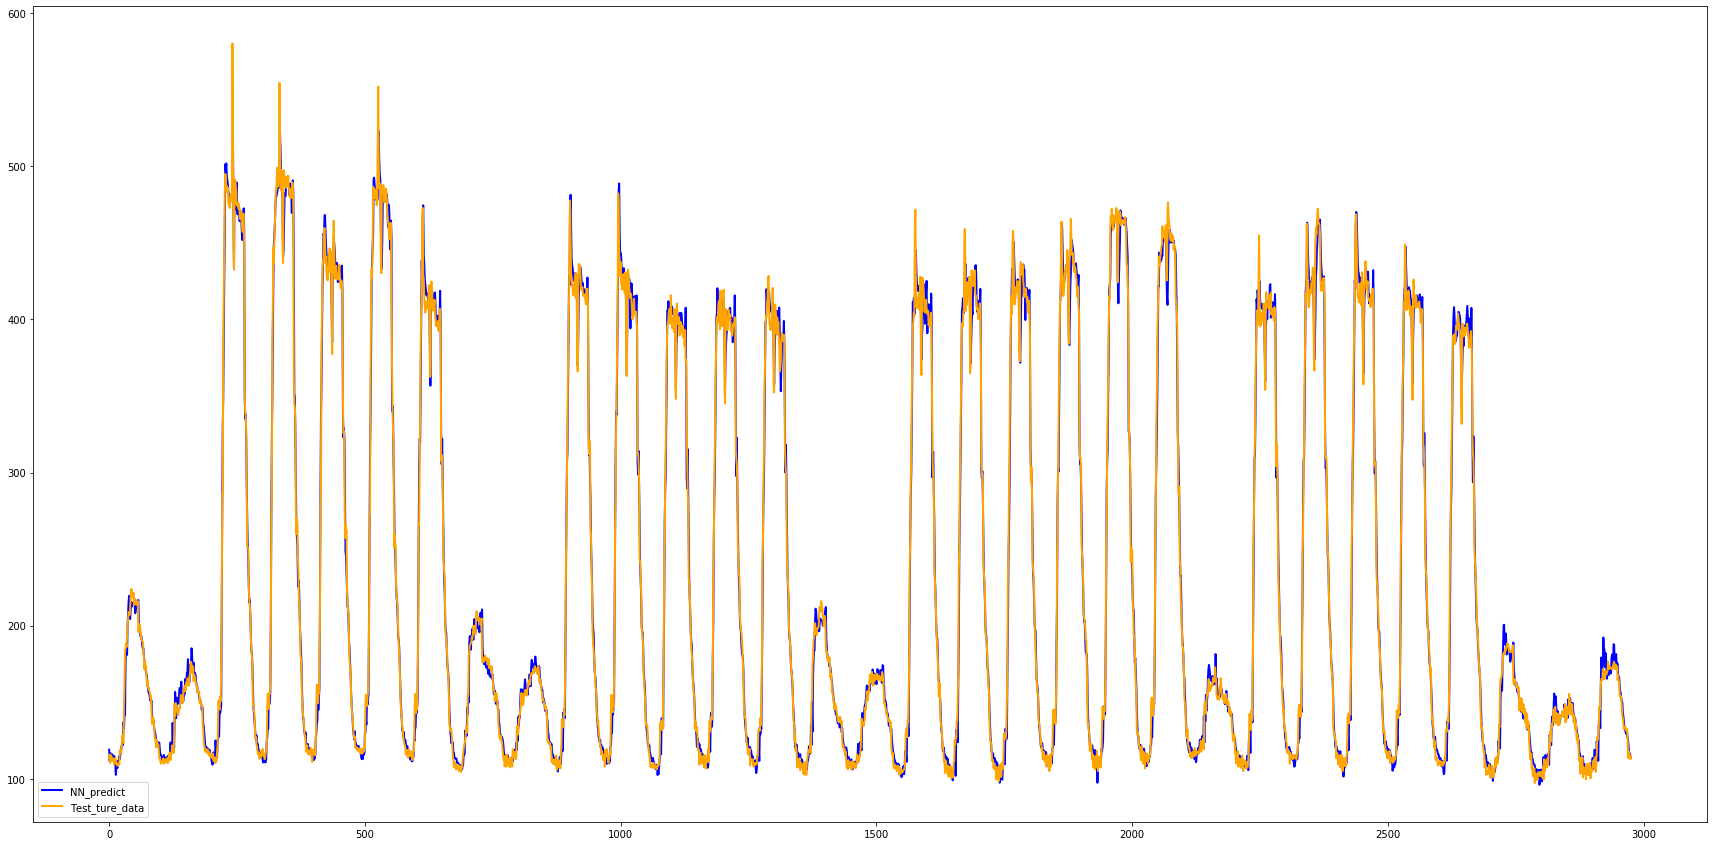

In [5]:
aaaa = show_model(best_model,X_test,Y_test)
time_end = time.time()
print ( time_end - start )

In [7]:
def data_no_date_change():          
    def scaler_read(var):
        xlsx = pd.read_csv('YO_3.csv')
        x = xlsx[var]
        x = max(x)
        return x
    
    def scaler_measure_transform(var,train,object_name):
        max_x = scaler_read(object_name)
        var = var/max_x
        return var
    
    def scaler_object(var,train):
        var['Period'] = scaler_measure_transform(var['Period'],"Period")
        var['hour'] = scaler_measure_transform(var['hour'],"hour")
        var['min'] = scaler_measure_transform(var['min'],"min")
        var['week']  = scaler_measure_transform(var['week'],"week")
        var['15min_Measure']  = scaler_measure_transform(var['15min_Measure'],"15min_Measure")
        var['30min_Measure']  = scaler_measure_transform(var['30min_Measure'],"30min_Measure")
        var['45min_Measure']  = scaler_measure_transform(var['45min_Measure'],"45min_Measure")
        var['60min_Measure']  = scaler_measure_transform(var['60min_Measure'],"60min_Measure")
        var['75min_Measure']  = scaler_measure_transform(var['75min_Measure'],"75min_Measure")
        var['90min_Measure']  = scaler_measure_transform(var['90min_Measure'],"90min_Measure")
        var['105min_Measure']  = scaler_measure_transform(var['105min_Measure'],"105min_Measure")
        var['120min_Measure']  = scaler_measure_transform(var['120min_Measure'],"120min_Measure")
        var['135min_Measure']  = scaler_measure_transform(var['135min_Measure'],"135min_Measure")
        var['150min_Measure']  = scaler_measure_transform(var['150min_Measure'],"150min_Measure")
        var['165min_Measure']  = scaler_measure_transform(var['165min_Measure'],"165min_Measure")
        var['180min_Measure']  = scaler_measure_transform(var['180min_Measure'],"180min_Measure")
        var['195min_Measure']  = scaler_measure_transform(var['195min_Measure'],"195min_Measure")
        var['210min_Measure']  = scaler_measure_transform(var['210min_Measure'],"210min_Measure")
        var['225min_Measure']  = scaler_measure_transform(var['225min_Measure'],"225min_Measure")
        var['240min_Measure']  = scaler_measure_transform(var['240min_Measure'],"240min_Measure")
        var['255min_Measure']  = scaler_measure_transform(var['255min_Measure'],"255min_Measure")
        var['270min_Measure']  = scaler_measure_transform(var['270min_Measure'],"270min_Measure")
        var['285min_Measure']  = scaler_measure_transform(var['285min_Measure'],"285min_Measure")
        var['300min_Measure']  = scaler_measure_transform(var['300min_Measure'],"300min_Measure")
        var['315min_Measure']  = scaler_measure_transform(var['315min_Measure'],"315min_Measure")
        var['330min_Measure']  = scaler_measure_transform(var['330min_Measure'],"330min_Measure")
        var['345min_Measure']  = scaler_measure_transform(var['345min_Measure'],"345min_Measure")
        var['360min_Measure']  = scaler_measure_transform(var['360min_Measure'],"360min_Measure")
        
        return var
         
    train_xlsx = pd.read_csv('YO_3.csv')
    test_xlsx = pd.read_csv('test_3.csv')

    df_train = train_xlsx[['Period','hour','min','week','holiday','15min_Measure','30min_Measure',
                           '45min_Measure','60min_Measure','75min_Measure','90min_Measure','105min_Measure',
                           '120min_Measure','135min_Measure','150min_Measure','165min_Measure','180min_Measure',
                           '195min_Measure','210min_Measure','225min_Measure','240min_Measure','255min_Measure',
                           '270min_Measure','285min_Measure','300min_Measure','315min_Measure','330min_Measure',
                           '345min_Measure','360min_Measure']]
    df_train_label = train_xlsx[['Measure']]
    df_test = test_xlsx[['Period','hour','min','week','holiday','15min_Measure','30min_Measure',
                           '45min_Measure','60min_Measure','75min_Measure','90min_Measure','105min_Measure',
                           '120min_Measure','135min_Measure','150min_Measure','165min_Measure','180min_Measure',
                           '195min_Measure','210min_Measure','225min_Measure','240min_Measure','255min_Measure',
                           '270min_Measure','285min_Measure','300min_Measure','315min_Measure','330min_Measure',
                           '345min_Measure','360min_Measure']]
    df_test_label = test_xlsx[['Measure']]
    labelencoder = LabelEncoder()
    df_train['Period'] = labelencoder.fit_transform(df_train['Period'])
    df_test['Period'] = labelencoder.fit_transform(df_test['Period'])
    
    
    
    X_train = df_train
    Y_train = df_train_label
    X_test = df_test
    Y_test = df_test_label
    return X_train, Y_train,X_test,Y_test

In [8]:
start = time.time()
X_train, Y_train, X_test, Y_test = data_no_date_change()
best_run, best_model = optim.minimize(model=model_fit,
                                      data=data_no_date_change,
                                      algo=tpe.suggest,
                                      max_evals=50,
                                      trials=Trials(),
                                      notebook_name='15mins_forecast')

print("Evalutation of best performing model:")
print(best_run)

D:\python\lib\site-packages\ipykernel_launcher.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\python\lib\site-packages\ipykernel_launcher.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


>>> Imports:
#coding=utf-8

try:
    from IPython.display import display_html
except:
    pass

try:
    import numpy as np
except:
    pass

try:
    import pandas as pd
except:
    pass

try:
    import os
except:
    pass

try:
    import matplotlib.pyplot as plt
except:
    pass

try:
    import matplotlib.ticker as ticker
except:
    pass

try:
    from keras.models import Sequential, load_model
except:
    pass

try:
    from keras.layers import Dense, LSTM
except:
    pass

try:
    from keras import losses
except:
    pass

try:
    import keras as keras
except:
    pass

try:
    from hyperopt import Trials, STATUS_OK, tpe
except:
    pass

try:
    from hyperas import optim
except:
    pass

try:
    import time
except:
    pass

try:
    import datetime
except:
    pass

try:
    from keras.callbacks import EarlyStopping
except:
    pass

try:
    from keras.layers import Dropout
except:
    pass

try:
    from keras.layers.advanced_activations import LeakyReLU
except:
    p

  26: 


C:\Users\user\Desktop\IDSL_ME\power\temp_model.py:170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_train['Period'] = labelencoder.fit_transform(df_train['Period'])
C:\Users\user\Desktop\IDSL_ME\power\temp_model.py:171: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_test['Period'] = labelencoder.fit_transform(df_test['Period'])


  0%|                                                                           | 0/50 [00:00<?, ?trial/s, best loss=?]WARNING:tensorflow:From D:\python\lib\site-packages\keras\backend\tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.

100%|████████████████████████████████████████████████| 50/50 [55:53<00:00, 60.27s/trial, best loss: 104.34333224381896]
Evalutation of best performing model:
{'Dense': 8, 'Dense_1': 1, 'Dense_2': 5, 'Dense_3': 1, 'Dense_4': 8, 'Dense_5': 1, 'Dense_6': 1, 'Dense_7': 1, 'Dropout': 0.017607086713852693, 'Dropout_1': 0.24843554419550856, 'Dropout_2': 0.172747671631669, 'Dropout_3': 0.2437735688928161, 'batch_size': 2}


[0.02683742]
MAPE= [0.02683742]
RMSE= 8.225992123211206
3355.3332979679108


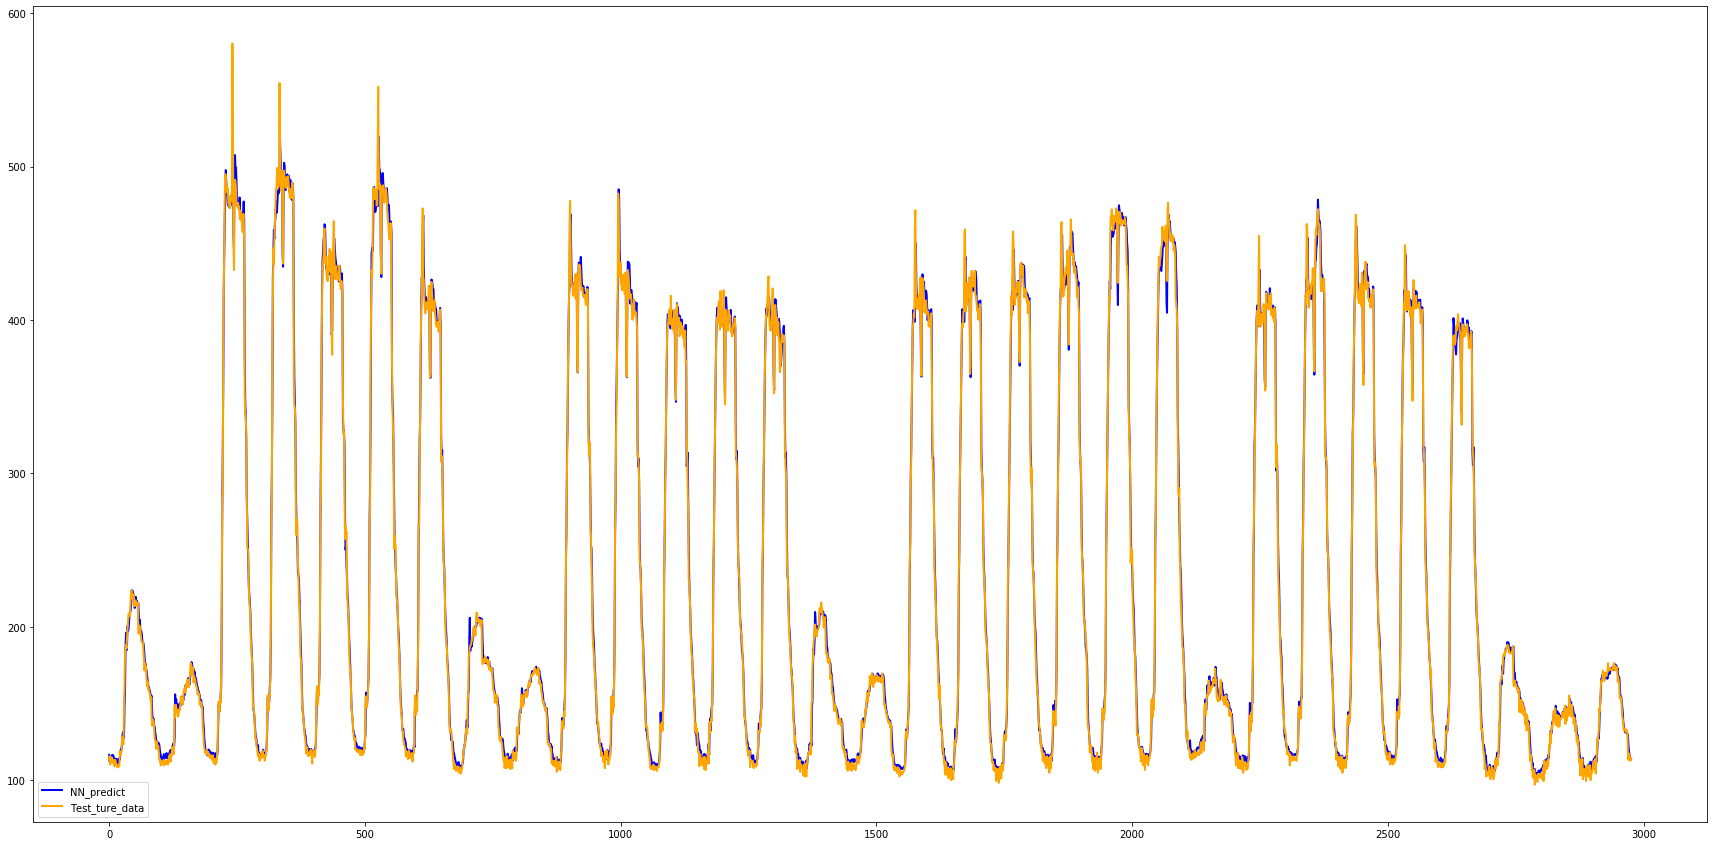

In [9]:
aaaa = show_model(best_model,X_test,Y_test)
time_end = time.time()
print ( time_end - start )